Dataset loaded successfully!

Dataset preview:
               carName model  year  sellingPrice condition  mileage  driven  \
0        Toyota Innova    EX  2021        789334      Fair    10.68  119650   
1        Ford Ecosport   XZ+  2022       1036030      Good    13.01  167674   
2           Honda City    ZX  2005        164945      Fair    18.32  178967   
3  Maruti Suzuki Swift   HTX  2005       1900348      Good    14.47   90450   
4  Maruti Suzuki Swift   VDI  2023       1806292      Good    11.89  173223   

       fuel  
0    Petrol  
1  Electric  
2    Diesel  
3    Petrol  
4  Electric  

Checking for missing values...
No missing values detected.

Dataset summary:
               year  sellingPrice       mileage        driven
count  10000.000000  1.000000e+04  10000.000000   10000.00000
mean    2014.004600  1.052523e+06     17.471424  100270.66370
std        5.462688  5.480648e+05      4.316489   57524.37661
min     2005.000000  1.001190e+05     10.000000    1013.00000
25%   

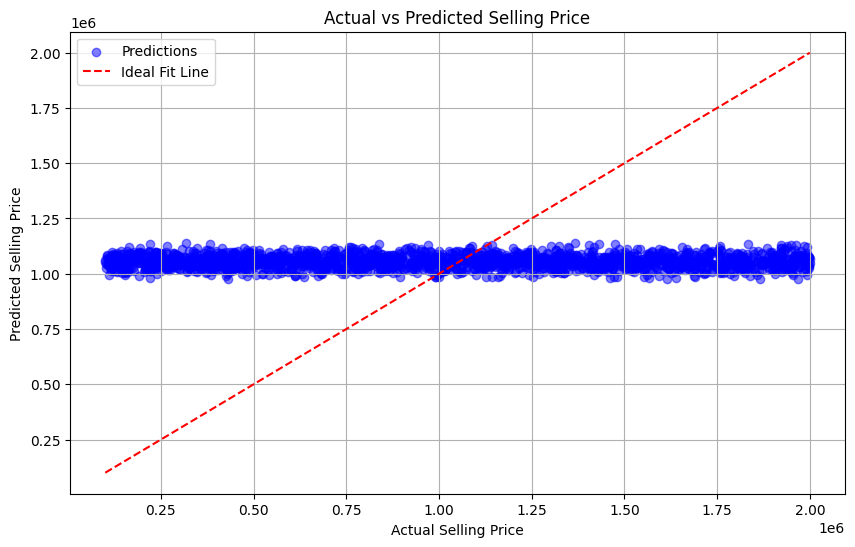

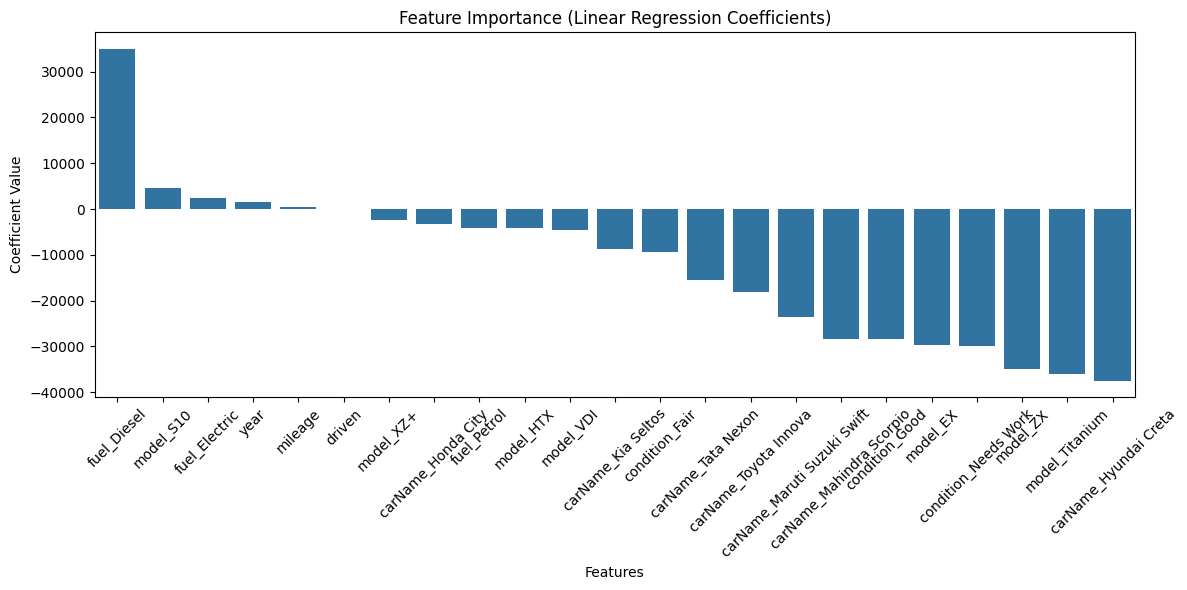

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = 'car-data.csv'  # Adjusted for uploaded file location
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and try again.")
    exit()

# Display the first few rows of the dataset
print("\nDataset preview:")
print(data.head())

# Check for missing values
print("\nChecking for missing values...")
missing_values = data.isnull().sum()
if missing_values.any():
    print("Missing values detected:\n", missing_values)
    print("\nDropping rows with missing values...")
    data.dropna(inplace=True)
else:
    print("No missing values detected.")

# Display dataset summary
print("\nDataset summary:")
print(data.describe())

# Check for categorical variables and apply one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    print(f"\nCategorical columns detected: {categorical_cols}")
    print("Applying one-hot encoding...")
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
else:
    print("\nNo categorical columns detected.")

# Drop unnecessary columns (update based on dataset)
drop_columns = ['carName', 'model'] if 'carName' in data.columns and 'model' in data.columns else []
if drop_columns:
    print(f"\nDropping unnecessary columns: {drop_columns}")
    data.drop(columns=drop_columns, inplace=True)

# Define features (X) and target variable (y)
target_col = 'sellingPrice'  # Adjust based on your dataset
if target_col in data.columns:
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    print(f"\nFeatures and target variable separated successfully.")
else:
    print(f"\nError: Target column '{target_col}' not found in dataset.")
    exit()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets.")

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
print("\nLinear Regression model trained successfully!")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Calculate train and test accuracy
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
print(f"Train R-squared: {train_r2:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

# Plotting the results: Actual vs Predicted Selling Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Fit Line')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()

# Visualize feature importance using coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
